2672021-7143-MDC_PRESS_BLD_ART_ABP-125.csv:


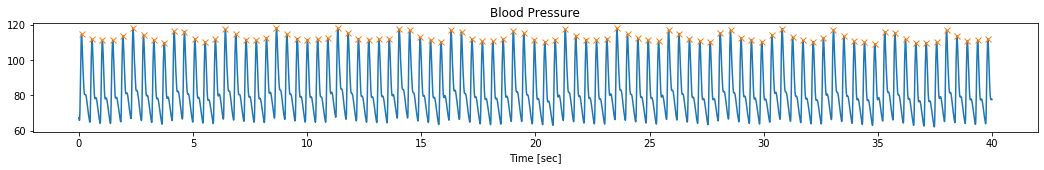

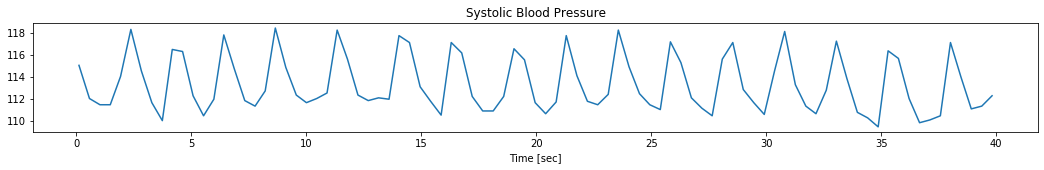

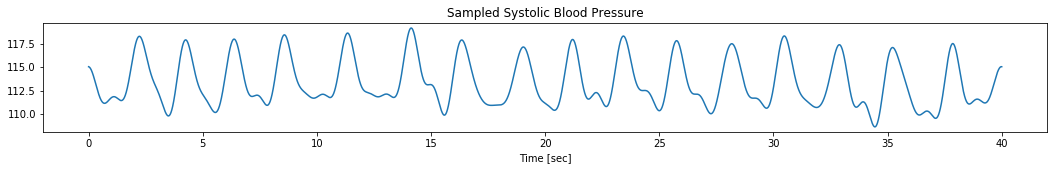

2672021-7143-MDC_ECG_ELEC_POTL_II-500.csv:


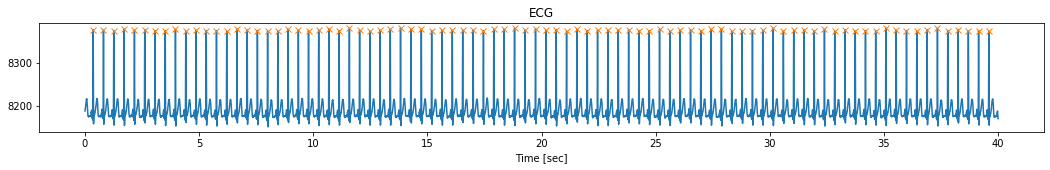

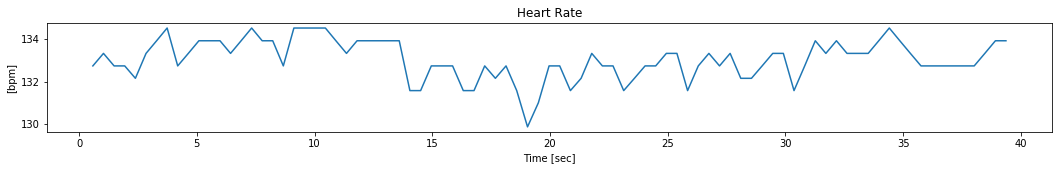

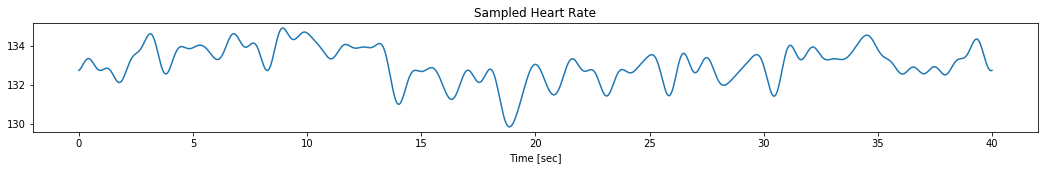

2672021-7143-MDC_RESP-62.5.csv:


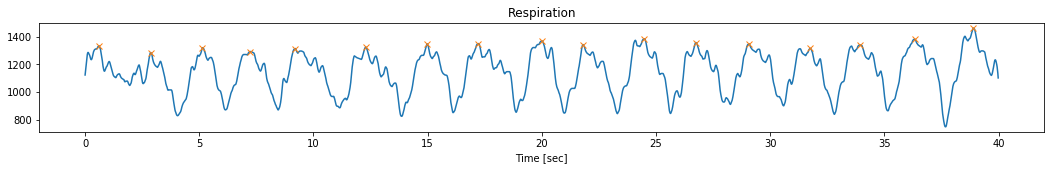

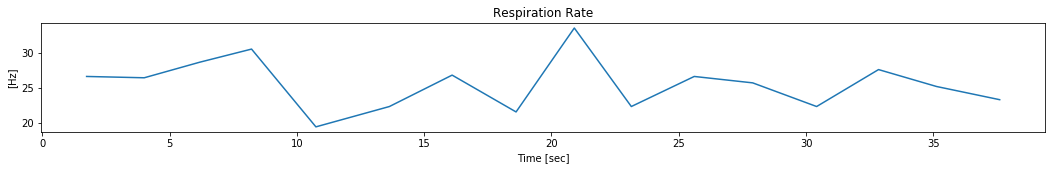

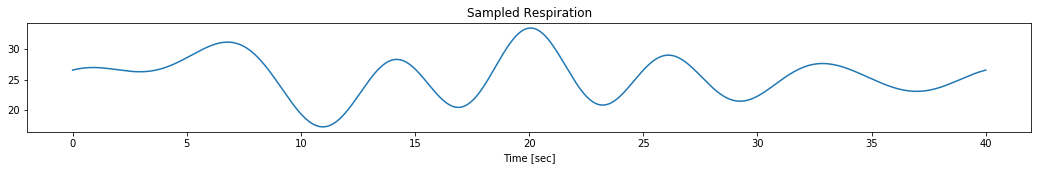

[ 1.00015251e+00 -1.35754990e-04  2.99439695e-05]
[ 1.77653065e-05 -1.59838132e-05  1.00000433e+00]
[1.85539711e-04 9.99837929e-01 2.09022840e-05]


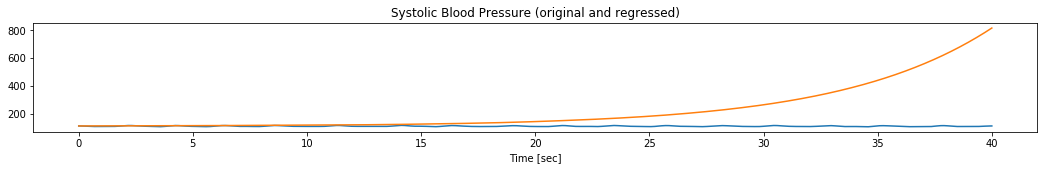

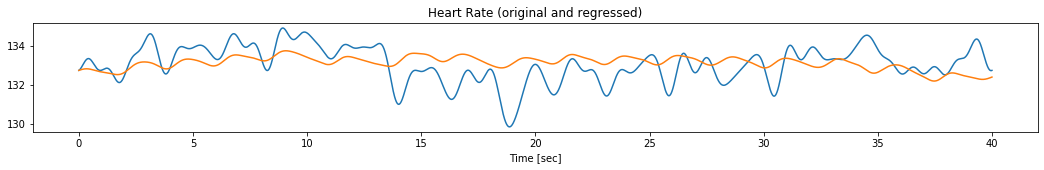

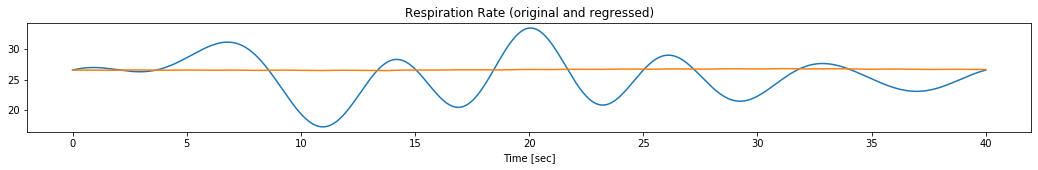

In [2]:
%run blood-pressure.ipynb
%run heart-rate.ipynb
%run respiration.ipynb

hr = hr_list[0]
rr = rr_list[0]
bp = sys_list[0]

# x is the 3 signals data from 0 to n-1
x = np.column_stack((bp, hr, rr))
x = np.delete(x, -1, axis=0)

# y_i is the data from 1 to n for the i signal
y_bp = np.delete(bp, 0)
y_rr = np.delete(rr, 0)
y_hr = np.delete(hr, 0)

# caulating the tranformation matrix using least squares 
bp_transformation = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_bp))
rr_transformation = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_rr))
hr_transformation = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_hr))

print(bp_transformation)
print(rr_transformation)
print(hr_transformation)

# caluclating each signal using the other two signals
bp_reg = []
bp_reg.append(bp[0])
for (hr_sample, rr_sample, bp_sample) in zip(hr, rr, bp_reg):
    bp_reg.append(bp_sample*bp_transformation[0] + hr_sample*bp_transformation[1] + rr_sample*bp_transformation[2])
    
hr_reg = []
hr_reg.append(hr[0])
for (hr_sample, rr_sample, bp_sample) in zip(hr_reg, rr, bp):
    hr_reg.append(bp_sample*hr_transformation[0] + hr_sample*hr_transformation[1] + rr_sample*hr_transformation[2])

rr_reg = []
rr_reg.append(rr[0])
for (hr_sample, rr_sample, bp_sample) in zip(hr, rr_reg, bp):
    rr_reg.append(bp_sample*rr_transformation[0] + hr_sample*rr_transformation[1] + rr_sample*rr_transformation[2])

# plot the three regressed signals
plt.figure(figsize=(18, 2))
plt.plot(sampled_t, bp)
plt.plot(sampled_t, bp_reg[1:])
plt.title('Systolic Blood Pressure (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(sampled_t, hr)
plt.plot(sampled_t, hr_reg[1:])
plt.title('Heart Rate (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(sampled_t, rr)
plt.plot(sampled_t, rr_reg[1:])
plt.title('Respiration Rate (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()
